In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df1= pd.read_csv('C:/Users/mayan/Desktop/New folder/Project Imarticus/Credit Risk Analysis/archive/XYZCorp_LendingData.txt', delimiter='\t')

In [3]:
df1.shape

(855969, 73)

In [3]:
import copy
df= copy.deepcopy(df1)

In [4]:
df.shape

(855969, 73)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Checking missing values


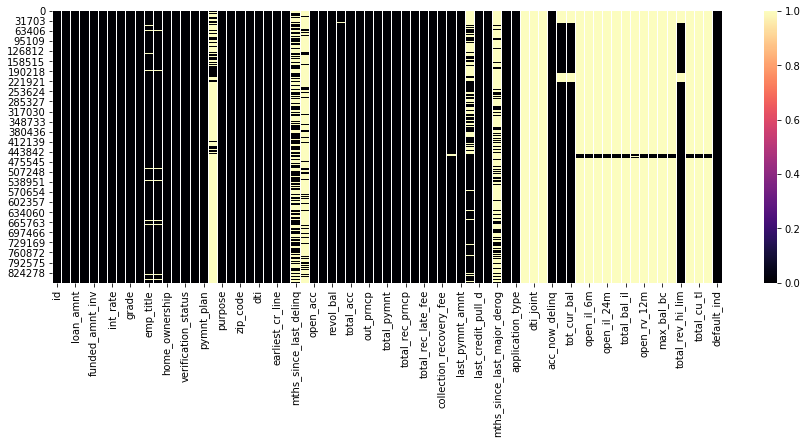

In [6]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='magma')

#### Percentage of missing values column wise

In [7]:
mis_data=df.isnull().mean().sort_values(ascending=False)*100
mis_data.head(20)

dti_joint                      99.948596
verification_status_joint      99.948363
annual_inc_joint               99.948363
il_util                        98.643759
mths_since_rcnt_il             98.488964
total_bal_il                   98.447607
inq_last_12m                   98.447607
open_acc_6m                    98.447607
open_il_6m                     98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_rv_12m                    98.447607
open_rv_24m                    98.447607
max_bal_bc                     98.447607
all_util                       98.447607
inq_fi                         98.447607
total_cu_tl                    98.447607
desc                           85.769111
mths_since_last_record         84.674211
mths_since_last_major_derog    75.099682
dtype: float64

#### Dropping Columns which have missing values more or equal to 50%

In [8]:
df=df.dropna(thresh=len(df)*0.5,axis=1)

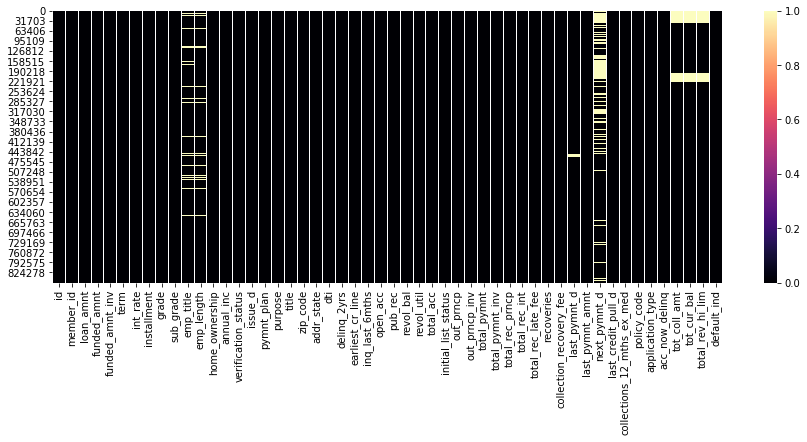

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='magma')

#### Checking for duplicates

In [10]:
df.duplicated().value_counts()

False    855969
dtype: int64

#### Summary of Data

In [11]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,855969.000000,855969.000000,855969.000000,855913.000000,855969.0,855969.000000,7.886560e+05,7.886560e+05,7.886560e+05,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,47.089499,4.951227,2225.985295,0.014230,1.0,0.004944,2.254129e+02,1.397662e+05,3.216357e+04,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,413.136043,62.478569,4864.966593,0.133712,0.0,0.077333,1.048945e+04,1.539385e+05,3.769964e+04,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,0.000000,0.000000,285.420000,0.000000,1.0,0.000000,0.000000e+00,2.987000e+04,1.400000e+04,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,0.000000,0.000000,468.820000,0.000000,1.0,0.000000,0.000000e+00,8.100850e+04,2.380000e+04,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,0.000000,0.000000,849.160000,0.000000,1.0,0.000000,0.000000e+00,2.087032e+05,3.990000e+04,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


#### Checking Fields data type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 52 columns):
id                            855969 non-null int64
member_id                     855969 non-null int64
loan_amnt                     855969 non-null float64
funded_amnt                   855969 non-null float64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null object
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null object
sub_grade                     855969 non-null object
emp_title                     806526 non-null object
emp_length                    812908 non-null object
home_ownership                855969 non-null object
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
issue_d                       855969 non-null object
pymnt_plan                    855969 

#### Categorical Fields

In [13]:
df.select_dtypes('object').apply(pd.Series.nunique,axis=0)

term                        2
grade                       7
sub_grade                  35
emp_title              290912
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   103
pymnt_plan                  2
purpose                    14
title                   60991
zip_code                  931
addr_state                 51
earliest_cr_line          697
initial_list_status         2
last_pymnt_d               97
next_pymnt_d                3
last_credit_pull_d        102
application_type            2
dtype: int64

In [14]:
columns=['term','application_type', 'pymnt_plan','purpose','grade','sub_grade','emp_length','home_ownership','verification_status']
for col in columns:
    df[col]= df[col].astype('category')

#### Coverting to Category Data type from Object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 52 columns):
id                            855969 non-null int64
member_id                     855969 non-null int64
loan_amnt                     855969 non-null float64
funded_amnt                   855969 non-null float64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null category
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null category
sub_grade                     855969 non-null category
emp_title                     806526 non-null object
emp_length                    812908 non-null category
home_ownership                855969 non-null category
annual_inc                    855969 non-null float64
verification_status           855969 non-null category
issue_d                       855969 non-null object
pymnt_plan               

## Exploratory Data Analysis

Text(0.5, 1.0, 'Non_Default Customer        Default Customer')

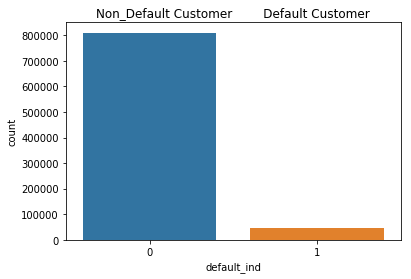

In [19]:
sns.countplot(df['default_ind'])
plt.title('Non_Default Customer        Default Customer')

In [20]:
df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [21]:
df['default_ind'].value_counts()/len(df)*100

0    94.571416
1     5.428584
Name: default_ind, dtype: float64

__We can note that Defaulter customer is very only 5.42 % in comparision to Non Defalter which are 94.57 %__

### Loan Term

In [22]:
df.term.value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

Text(0.5, 1.0, 'Loan Terms')

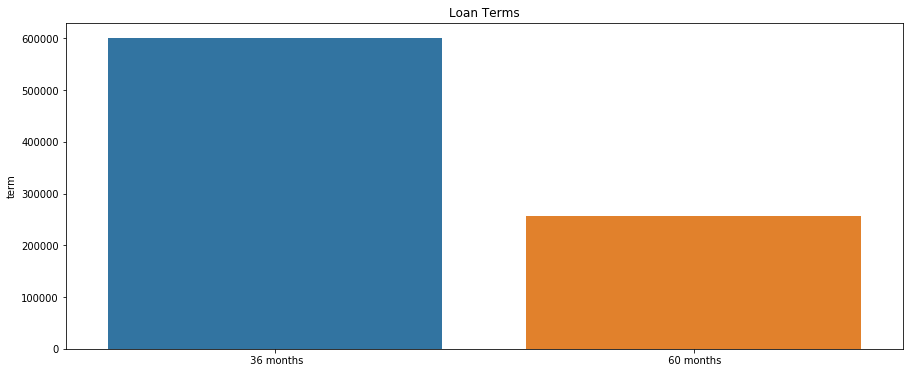

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(y=df['term'].value_counts(), x=df['term'].value_counts().index)
plt.title("Loan Terms")

___People have prefered taking loan for_  3 years  _than_  5 years__

### Grade

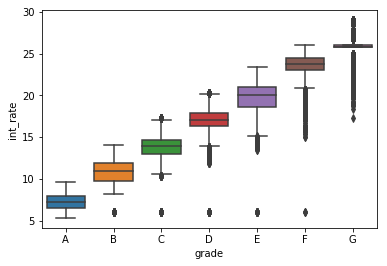

In [26]:
sns.boxplot(data=df,x='grade',y='int_rate')

__We can observe that interest rate is increasing with grades i.e. Grade A  being minimum interest rate and Grade G being Maximum__

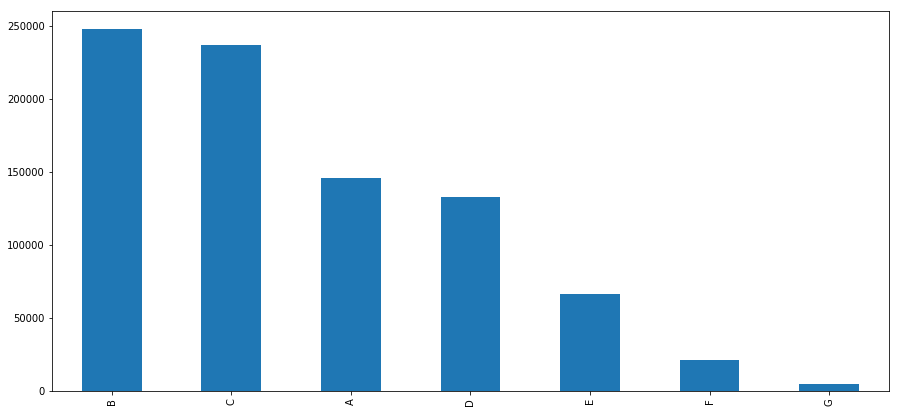

In [27]:
plt.figure(figsize=(15,7))
df.grade.value_counts().plot(kind='bar')

__It appear Grade B & C are dominant ones'__


## Loan Purpose

In [28]:
df.purpose.nunique()

14

In [29]:
df.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

Text(0.5, 1.0, 'Purpose of Taking Loan')

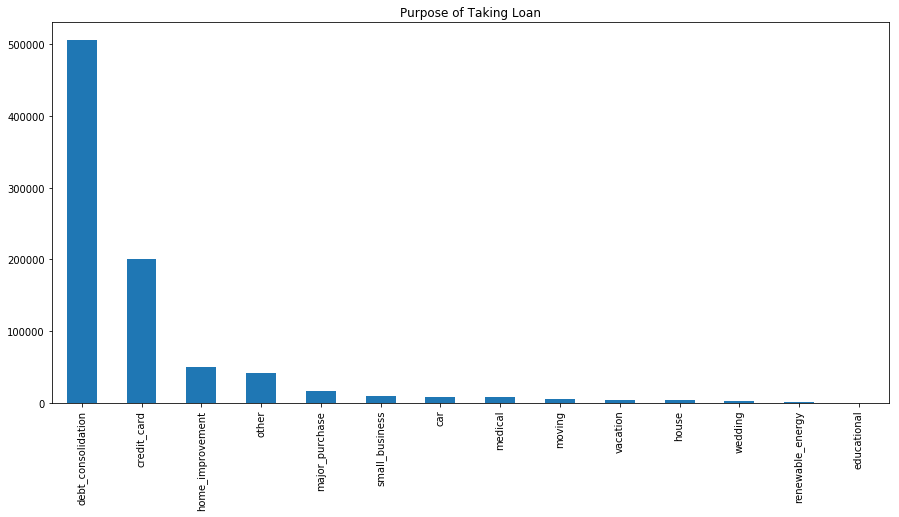

In [30]:
plt.figure(figsize=(15,7))
df.purpose.value_counts().plot(kind='bar').set_title('Purpose of Taking Loan')

__It appears that most of the loans are for debt_consolidation & credit card__

In [100]:
df['purpose'] = df['purpose'].map({'debt_consolidation':1, 'credit_card':2, 
                                       'home_improvement':3, 'other':4, 'major_purchase':5, 
                                       'small_business':6, 'car':7, 'medical':8,
                                       'moving':9, 'vacation':10, 'house':11,'wedding':12,
                                       'renewable_energy':13,'educational':14})

__Assigning to numerical values__

In [31]:
df['purpose'].head()

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: category
Categories (14, object): [car, credit_card, debt_consolidation, educational, ..., renewable_energy, small_business, vacation, wedding]

### Issue Date

In [32]:
df.issue_d.head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [33]:
df['Month']=df['issue_d'].transform(lambda x: x.split('-')[0])
df['Year']=df['issue_d'].transform(lambda x: x.split('-')[1])

In [34]:
df.drop(['issue_d'],axis =1, inplace=True)

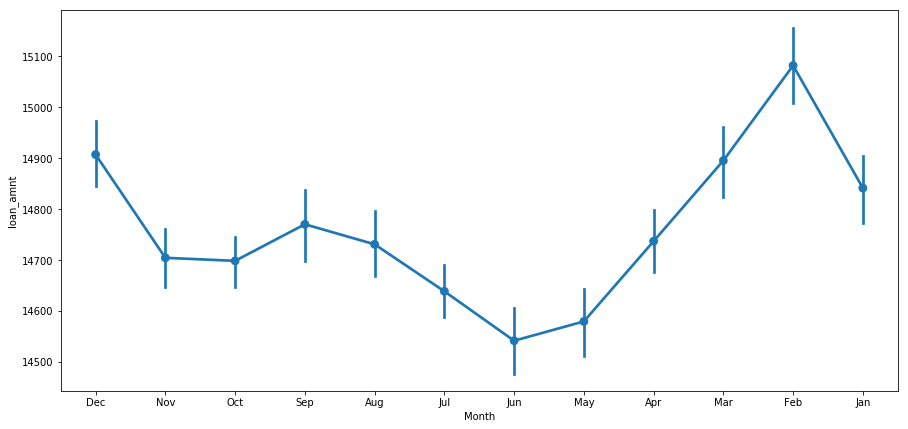

In [38]:
plt.figure(figsize = (15,7))
sns.pointplot(data=df, x='Month', y='loan_amnt')


__We can clearly see that there Loan application is highest in Staring Months of the Year including December__

In [37]:
df['Year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: Year, dtype: object

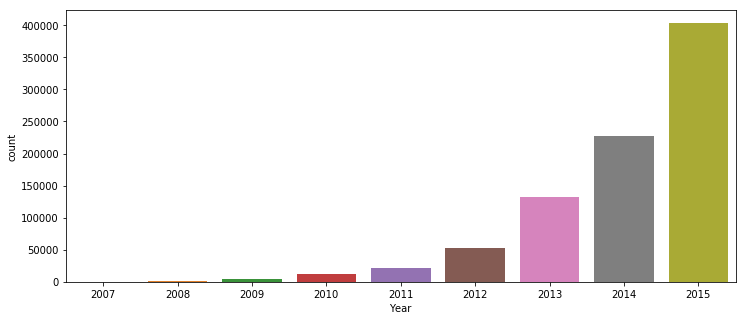

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(data= df, x='Year')

__We can also observe that no. of loan application rises over a period of years__

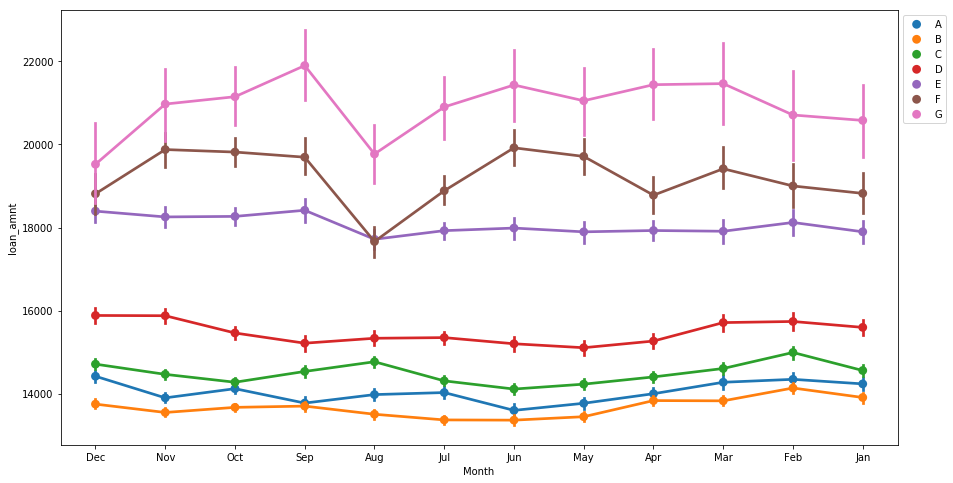

In [42]:
plt.figure(figsize=(15,8))

sns.pointplot(data=df, x='Month', y='loan_amnt', hue='grade')
plt.legend(bbox_to_anchor=(1, 1))

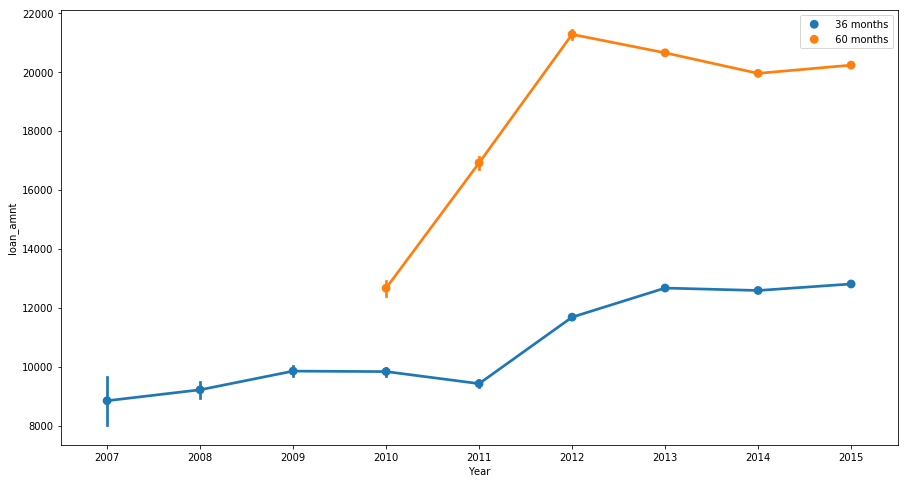

In [45]:
plt.figure(figsize=(15,8))

sns.pointplot(data=df, x='Year', y='loan_amnt', hue='term')
plt.legend(bbox_to_anchor=(1, 1))

__We can observe that people who taken the large loan have more term period.__

In [46]:
df['Month'] = df['Month'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                   'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'},regex = True)

In [47]:
df['Year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: Year, dtype: object

In [48]:
df['new'] = df['Year'].map(str) + df['Month']

In [49]:
df['new']= df.new.sort_values()

In [50]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind', 'Month', 'Year', 'new'],
      dtype='object')

In [51]:
df.drop(['Month', 'Year'],axis=1, inplace= True)

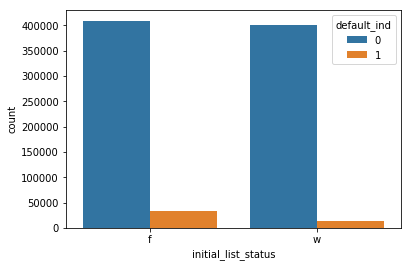

In [52]:
sns.countplot('initial_list_status',data=df,hue='default_ind')

Text(0.5, 1.0, 'Enquire in last 6 months vs Defalter')

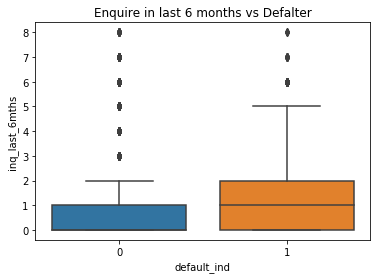

In [53]:
sns.boxplot(data=df,x= 'default_ind',y='inq_last_6mths').set_title('Enquire in last 6 months vs Defalter')

Text(0.5, 1.0, 'Loan amount vs Verification Status')

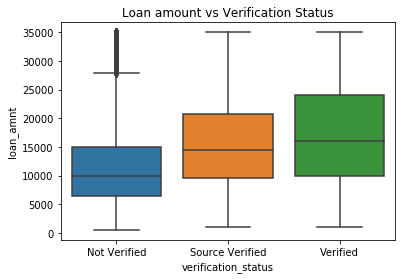

In [54]:
sns.boxplot(data= df, x='verification_status', y='loan_amnt').set_title('Loan amount vs Verification Status')

In [55]:
df['verification_status'] = df['verification_status'].map({'Source Verified':1,'Verified':2, 'Not Verified':3})

In [56]:
df.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [57]:
df.verification_status.value_counts()

1    318178
2    280049
3    257742
Name: verification_status, dtype: int64

In [58]:
df['home_ownership'] = np.where(df['home_ownership']=='NONE', 'OTHER', df['home_ownership'])
df['home_ownership'] = np.where(df['home_ownership']=='ANY', 'OTHER', df['home_ownership'])

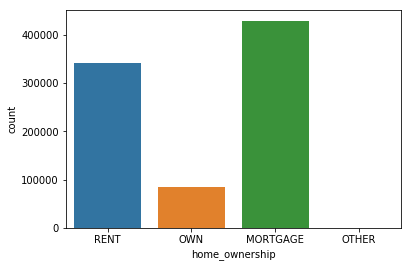

In [59]:
sns.countplot('home_ownership',data=df)

In [60]:
df['home_ownership'] = df['home_ownership'].map({'MORTGAGE':1,'RENT':2,'OWN':3,'OTHER':4})

In [61]:
df['home_ownership'].head()

0    2
1    2
2    2
3    2
4    2
Name: home_ownership, dtype: int64

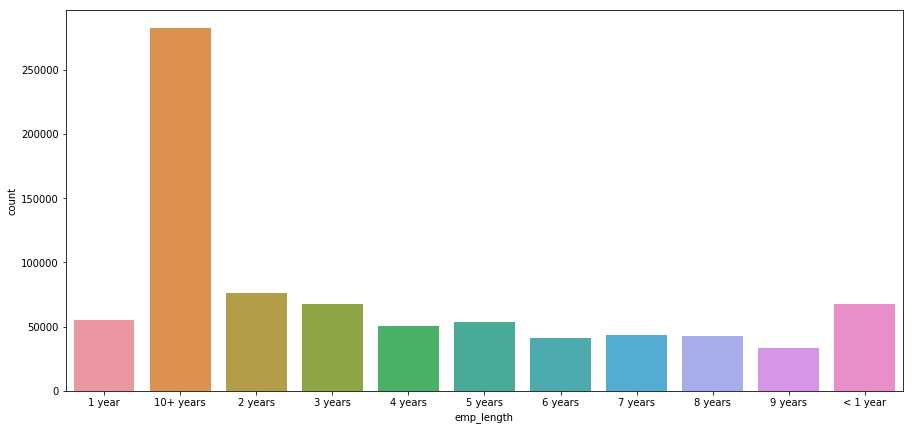

In [62]:
plt.figure(figsize=(15,7))
sns.countplot('emp_length',data=df)

In [63]:
df['emp_length'] = df['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2,'3 years':3, '4 years':4, 
                                             '5 years':5,'6 years':6, '7 years':7, '8 years':8,
                                             '9 years':9, '10+ years':10})

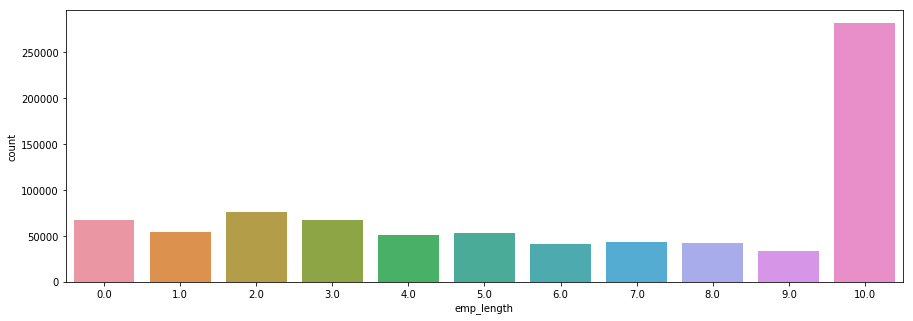

In [64]:
plt.figure(figsize=(15,5))
sns.countplot('emp_length',data=df)

In [65]:
df=df.drop(['id','member_id','zip_code','application_type','policy_code','pymnt_plan','emp_title','acc_now_delinq','title','last_pymnt_d','next_pymnt_d','last_credit_pull_d','earliest_cr_line'],axis=1)

__id, member_id, zip_code:__ They contains unique number

__policy_code,pymnt_plan:__ They have same information in all observation

__addr_state:__ This contains address code of the places

__application_type:__ Mostly it contains single value

__acc_now_delinq:__ It mostly contains single value 0 around 99%

__next_pymnt_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line:__ They both contains date

__emp_title,title:__ They are the title of the employees so we have discarded it

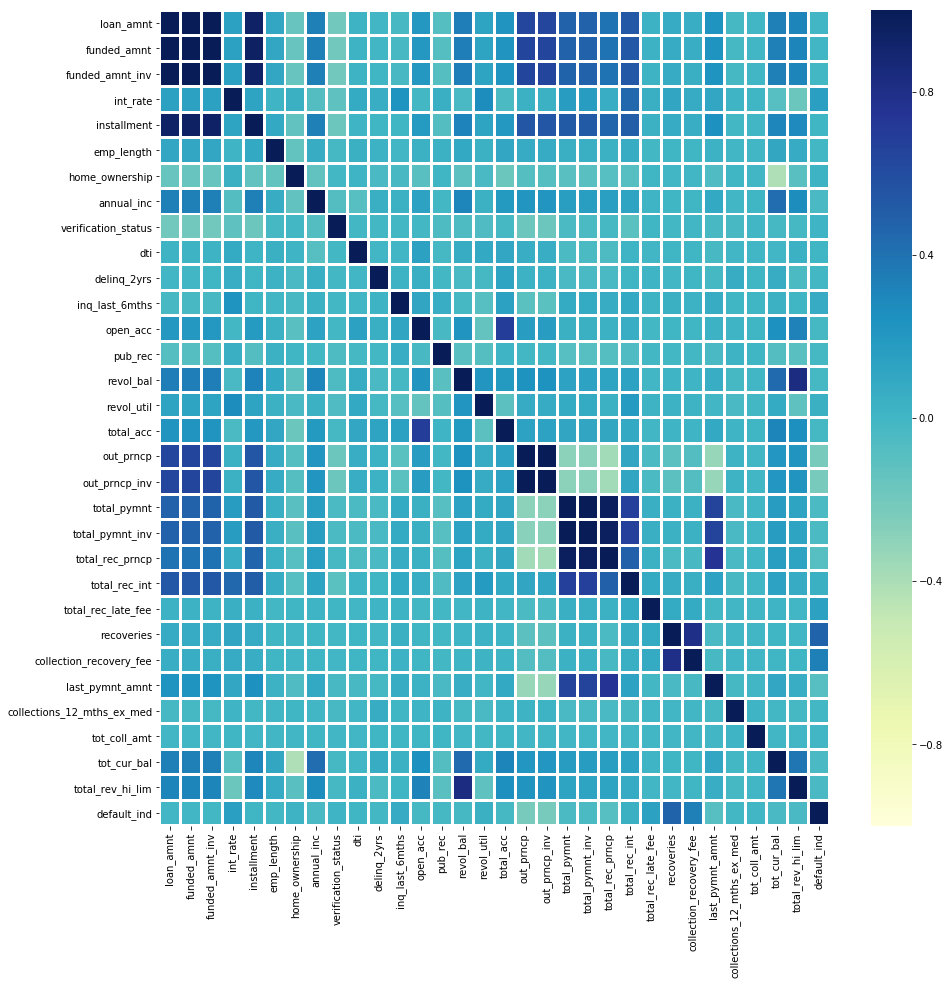

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmax=1, vmin=-1, center=0, linewidth=2, cmap='YlGnBu')

In [ ]:
df.columns

In [104]:
df3=df.drop(['funded_amnt','out_prncp_inv', 'installment','funded_amnt_inv','total_pymnt_inv', 'total_rec_prncp','total_rev_hi_lim','collection_recovery_fee'],
          axis=1)

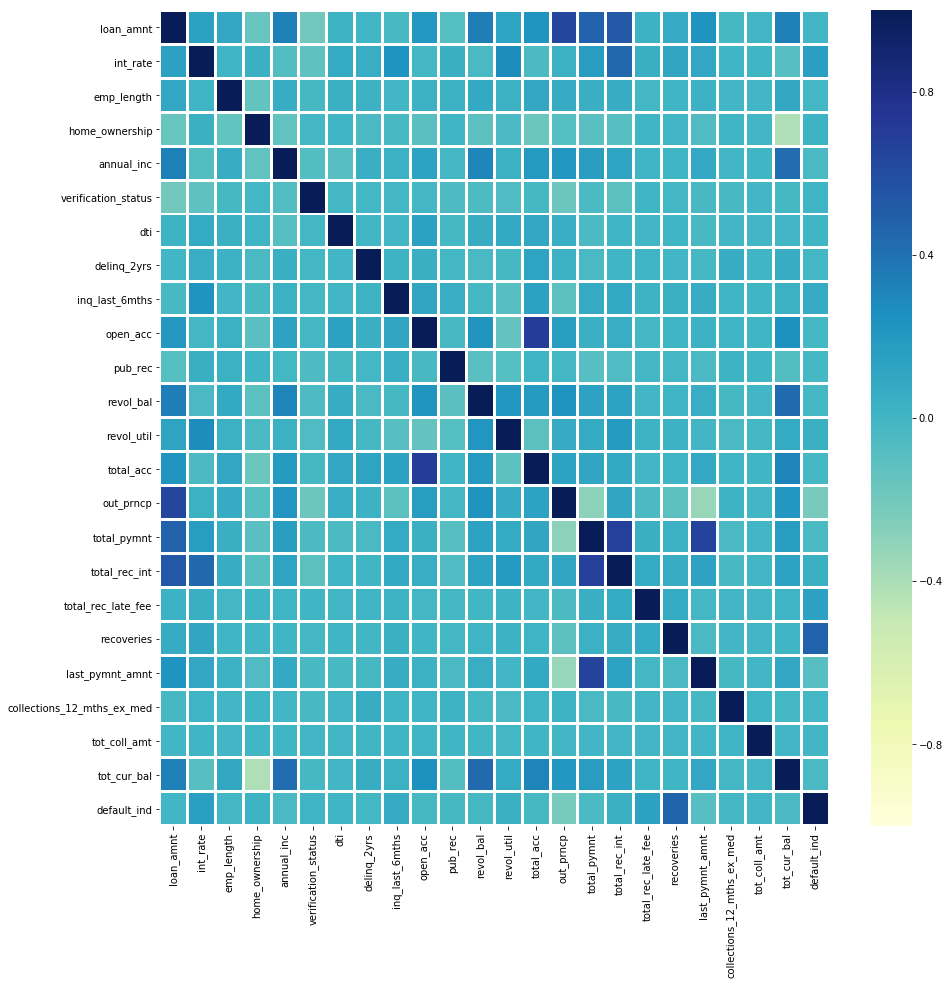

In [68]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(),vmax=1, vmin=-1, center=0, linewidth=2, cmap='YlGnBu')

In [70]:
df3['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [105]:
df3['grade'] = df['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [106]:
df3=df3.drop('sub_grade',axis=1)

In [107]:
df3['term']= df3['term'].astype(object)

In [108]:
df3['term'] = df3['term'].replace({'36 months':1,'60 months':2},regex = True)

In [109]:
df3['term'].value_counts()

1    600221
2    255748
Name: term, dtype: int64

In [110]:
df3['verification_status'].head()

0    2
1    1
2    3
3    1
4    1
Name: verification_status, dtype: int64

In [111]:
df3['initial_list_status'] = df3['initial_list_status'].map({'f':1,'w':2})

In [112]:
df3.drop(['addr_state'],axis=1,inplace=True)

## Dividing into Train and Test 

In [113]:
df3 = df3.set_index('new')

In [114]:
df3=df3.sort_values('new')

In [115]:
df3.head()


,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,default_ind
new,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,1,13.75,5,0.0,3,22000.0,3,1,14.29,...,0.0,9194.98,1694.98,0.0,0.0,256.59,NaN,NaN,NaN,0
200707,5000.0,1,7.43,1,8.0,1,150000.0,3,3,0.00,...,0.0,5174.17,174.17,0.0,0.0,4397.47,NaN,NaN,NaN,0
200707,5750.0,1,7.43,1,10.0,1,125000.0,3,1,0.27,...,0.0,6421.50,671.50,0.0,0.0,4.74,NaN,NaN,NaN,0
200707,5000.0,1,7.43,1,6.0,2,40000.0,3,7,2.55,...,0.0,5593.39,593.39,0.0,0.0,158.65,NaN,NaN,NaN,0
200707,1200.0,1,11.54,3,0.0,2,20000.0,3,2,2.04,...,0.0,1425.37,225.37,0.0,0.0,39.45,NaN,NaN,NaN,0


#### We have taken Training data from June 2007 to May 2015 rest are Test Data

In [116]:
train = df3.loc['200706':'201505',:]
test = df3.loc['201506':'201512',:]

## Missing Value Treatment

In [117]:
df3.isna().sum()

loan_amnt                         0
term                              0
int_rate                          0
grade                             0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
collections_12_mths_ex_med       56
tot_coll_amt                  67313
tot_cur_bal                   67313
default_ind                 

#### Numerical Column missing value treatment

In [118]:
## Tot_cur_bal

train['tot_cur_bal'].fillna(int(train['tot_cur_bal'].mean()), inplace=True)
test['tot_cur_bal'].fillna(int(test['tot_cur_bal'].mean()), inplace=True)

In [119]:
## Tot_coll_amt

train['tot_coll_amt'].fillna(int(train['tot_coll_amt'].mean()), inplace=True)
test['tot_coll_amt'].fillna(int(test['tot_coll_amt'].mean()), inplace=True)

In [120]:
## revol_util
train['revol_util'].fillna(int(train['revol_util'].mean()), inplace=True)
test['revol_util'].fillna(int(test['revol_util'].mean()), inplace=True)


#### Categorical Missing Values Treatment

In [121]:
## collections_12_mths_ex_med
train['collections_12_mths_ex_med'].fillna(train['collections_12_mths_ex_med'].mode()[0],inplace=True)
test['collections_12_mths_ex_med'].fillna(test['collections_12_mths_ex_med'].mode()[0],inplace=True)

In [122]:
## emp_length
train['emp_length'].fillna(train['emp_length'].mode()[0],inplace=True)
test['emp_length'].fillna(test['emp_length'].mode()[0],inplace=True)

In [123]:
test.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
tot_coll_amt                  0
tot_cur_bal                   0
default_ind                   0
dtype: int64

__Checking if any categorical variable is left or not before scaling the data__ 

In [124]:
x_train= train.drop(['default_ind'],axis=1)
y_train= train['default_ind']
x_test= test.drop(['default_ind'],axis=1)
y_test= test['default_ind']

In [125]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((598978, 27), (598978,), (256991, 27), (256991,))

In [126]:
x_train.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal
new,,,,,,,,,,,,,,,,,,,,,
200706,7500.0,1,13.75,5,0.0,3,22000.0,3,1,14.29,...,1,0.0,9194.98,1694.98,0.0,0.0,256.59,0.0,208.0,138990.0
200707,5000.0,1,7.43,1,8.0,1,150000.0,3,3,0.00,...,1,0.0,5174.17,174.17,0.0,0.0,4397.47,0.0,208.0,138990.0
200707,5750.0,1,7.43,1,10.0,1,125000.0,3,1,0.27,...,1,0.0,6421.50,671.50,0.0,0.0,4.74,0.0,208.0,138990.0
200707,5000.0,1,7.43,1,6.0,2,40000.0,3,7,2.55,...,1,0.0,5593.39,593.39,0.0,0.0,158.65,0.0,208.0,138990.0
200707,1200.0,1,11.54,3,0.0,2,20000.0,3,2,2.04,...,1,0.0,1425.37,225.37,0.0,0.0,39.45,0.0,208.0,138990.0


## Scaling of Data

In [97]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [98]:
x_cols=['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal']

In [127]:
xtrain= pd.DataFrame(scaler.fit_transform(x_train.values),columns=x_cols)
xtest= pd.DataFrame(scaler.fit_transform(x_test.values),columns=x_cols)

In [128]:
xtrain.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal
0,-0.844559,-0.634014,0.052412,1.682281,-1.698028,2.150909,-0.915633,1.286434,-0.521055,-0.414882,...,-0.809528,-0.811282,-0.108522,-0.255238,-0.103534,-0.136873,-0.474069,-0.09384,-0.000069,-0.000003
1,-1.144446,-0.634014,-1.393496,-1.365338,0.492187,-0.900607,1.339413,1.286434,0.567029,-2.185476,...,-0.809528,-0.811282,-0.605437,-0.924911,-0.103534,-0.136873,0.292991,-0.09384,-0.000069,-0.000003
2,-1.054480,-0.634014,-1.393496,-1.365338,1.039741,-0.900607,0.898974,1.286434,-0.521055,-2.152022,...,-0.809528,-0.811282,-0.451285,-0.705917,-0.103534,-0.136873,-0.520722,-0.09384,-0.000069,-0.000003
3,-1.144446,-0.634014,-1.393496,-1.365338,-0.055367,0.625151,-0.598518,1.286434,2.743197,-1.869520,...,-0.809528,-0.811282,-0.553627,-0.740312,-0.103534,-0.136873,-0.492212,-0.09384,-0.000069,-0.000003
4,-1.600275,-0.634014,-0.453198,0.158472,-1.698028,0.625151,-0.950869,1.286434,0.022987,-1.932711,...,-0.809528,-0.811282,-1.068736,-0.902366,-0.103534,-0.136873,-0.514292,-0.09384,-0.000069,-0.000003


In [129]:
xtest.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal
0,2.296958,-0.696887,-0.763503,-0.579417,-1.411906,-0.906737,0.663111,0.162332,-0.543741,0.250665,...,0.676633,1.804893,1.799937,2.080642,-0.035273,-0.001973,0.092315,-0.131371,-0.118501,0.548148
1,-0.432428,1.434953,-0.763503,-0.579417,1.003884,0.569729,-0.045980,-1.045166,-0.543741,0.148901,...,0.676633,-0.375779,-0.181011,-0.071380,-0.035273,-0.001973,-0.213489,-0.131371,-0.118501,-0.539513
2,-0.374356,1.434953,0.746406,0.976368,-1.143485,0.569729,-0.375201,-1.045166,-0.543741,0.414921,...,0.676633,-0.304190,-0.089628,0.631196,-0.035273,-0.001973,-0.196155,-0.131371,-0.118501,-0.513548
3,2.296958,-0.696887,-0.031994,0.198476,-0.875064,-0.906737,0.549150,0.162332,-0.543741,0.100068,...,0.676633,1.833028,1.916567,3.165385,-0.035273,-0.001973,0.110323,-0.131371,-0.118501,0.865913
4,1.367805,1.434953,-0.995617,-0.579417,1.003884,-0.906737,0.283241,-1.045166,0.072901,-0.017746,...,0.676633,1.265776,0.563935,1.183301,-0.035273,-0.001973,-0.105240,-0.131371,-0.118501,0.435677


## Modelling

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, y_train)
y_pred=model.predict(xtest)
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       1.00      0.83      0.91    256680
           1       0.01      0.90      0.01       311

    accuracy                           0.83    256991
   macro avg       0.50      0.87      0.46    256991
weighted avg       1.00      0.83      0.90    256991



In [131]:
print(accuracy_score(y_test,y_pred))

0.8274258631625232


In [ ]:
### Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, y_train)
y_pred=model.predict(xtest)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.00    256991
   macro avg       0.00      0.50      0.00    256991
weighted avg       0.00      0.00      0.00    256991



In [133]:
print(accuracy_score(y_test,y_pred))

0.0012101591106303334


### Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion='entropy')
model.fit(xtrain, y_train)
y_pred=model.predict(xtest)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84    256680
           1       0.00      0.85      0.01       311

    accuracy                           0.73    256991
   macro avg       0.50      0.79      0.43    256991
weighted avg       1.00      0.73      0.84    256991



In [136]:
print(accuracy_score(y_test,y_pred))

0.730395227848446


### Gradient Boost Classifier

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(xtrain, y_train)
y_pred=model.predict(xtest)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.00    256991
   macro avg       0.50      0.50      0.00    256991
weighted avg       1.00      0.00      0.01    256991



In [138]:
print(accuracy_score(y_test,y_pred))

0.0037238658163126336


## We can clearly observe that due to inbalaced data none of the model performing well so we have to balance it.

## Over-Sampling

In [47]:
X = train.iloc[:,0:-1].values
Y = train.iloc[:,-1].values

In [48]:
fraud= df3[df3['default_ind']==1]
normal= df3[df3['default_ind']==0]

In [ ]:
fraud.shape

In [60]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_o_res, Y_o_res = os.fit_sample(X, Y)

__X_o_res:__ 'X' Over sampling result ; __Y_o_res:__ 'Y' Over sampling result

In [63]:
print(X_o_res.shape,Y_o_res.shape)

(1105644, 27) (1105644,)


In [68]:
cols=['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal']

new_df= pd.DataFrame(X_o_res,columns=cols)
new_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal
0,7500.0,1.0,13.75,5.0,0.0,3.0,22000.0,3.0,1.0,14.29,...,1.0,0.0,9194.98,1694.98,0.0,0.0,256.59,0.0,208.0,138990.0
1,5000.0,1.0,7.43,1.0,8.0,1.0,150000.0,3.0,3.0,0.00,...,1.0,0.0,5174.17,174.17,0.0,0.0,4397.47,0.0,208.0,138990.0
2,5750.0,1.0,7.43,1.0,10.0,1.0,125000.0,3.0,1.0,0.27,...,1.0,0.0,6421.50,671.50,0.0,0.0,4.74,0.0,208.0,138990.0
3,5000.0,1.0,7.43,1.0,6.0,2.0,40000.0,3.0,7.0,2.55,...,1.0,0.0,5593.39,593.39,0.0,0.0,158.65,0.0,208.0,138990.0
4,1200.0,1.0,11.54,3.0,0.0,2.0,20000.0,3.0,2.0,2.04,...,1.0,0.0,1425.37,225.37,0.0,0.0,39.45,0.0,208.0,138990.0


In [77]:
df_scale= pd.DataFrame(scaler.fit_transform(new_df),columns=cols)
df_scale.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal
0,-0.844549,-0.685507,-0.203703,1.380475,-1.678929,2.130106,-0.843116,1.320959,-0.523653,-0.463354,...,-0.717742,-0.535824,0.111429,-0.235313,-0.180459,-0.36718,-0.354719,-0.08961,0.002948,0.067732
1,-1.143558,-0.685507,-1.603481,-1.516542,0.513724,-0.953493,1.411800,1.320959,0.490559,-2.244760,...,-0.717742,-0.535824,-0.444670,-0.908484,-0.180459,-0.36718,0.639079,-0.08961,0.002948,0.067732
2,-1.053855,-0.685507,-1.603481,-1.516542,1.061887,-0.953493,0.971387,1.320959,-0.523653,-2.211102,...,-0.717742,-0.535824,-0.272158,-0.688346,-0.180459,-0.36718,-0.415162,-0.08961,0.002948,0.067732
3,-1.143558,-0.685507,-1.603481,-1.516542,-0.034439,0.588307,-0.526018,1.320959,2.518982,-1.926875,...,-0.717742,-0.535824,-0.386690,-0.722921,-0.180459,-0.36718,-0.378224,-0.08961,0.002948,0.067732
4,-1.598052,-0.685507,-0.693183,-0.068034,-1.678929,0.588307,-0.878349,1.320959,-0.016547,-1.990452,...,-0.717742,-0.535824,-0.963148,-0.885821,-0.180459,-0.36718,-0.406832,-0.08961,0.002948,0.067732


In [86]:
new_res= pd.Series(Y_o_res)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_scale,new_res,test_size=0.3, random_state=5)

In [89]:
from sklearn.linear_model import LogisticRegression

L_model=LogisticRegression()
L_model.fit(X_train,Y_train)
y_pred=L_model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    165678
           1       1.00      0.96      0.98    166016

    accuracy                           0.98    331694
   macro avg       0.98      0.98      0.98    331694
weighted avg       0.98      0.98      0.98    331694



In [ ]:
print(accuracy_score(Y_test,y_pred))

In [59]:
from sklearn.tree import DecisionTreeClassifier

D_model = DecisionTreeClassifier()
D_model.fit(X_train, Y_train)
y_pred=D_model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    165678
           1       0.95      1.00      0.98    166016

    accuracy                           0.97    331694
   macro avg       0.98      0.97      0.97    331694
weighted avg       0.98      0.97      0.97    331694



In [ ]:
print(accuracy_score(Y_test,y_pred))

In [91]:
from sklearn.ensemble import RandomForestClassifier

R_model = RandomForestClassifier()
R_model.fit(X_train, Y_train)
y_pred=R_model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165678
           1       1.00      1.00      1.00    166016

    accuracy                           1.00    331694
   macro avg       1.00      1.00      1.00    331694
weighted avg       1.00      1.00      1.00    331694



In [ ]:
print(accuracy_score(Y_test,y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

G_model=GradientBoostingClassifier(n_estimators=130)
G_model.fit(X_train,Y_train)
y_pred=G_model.predict(X_test)
print(classification_report(Y_test, y_pred))

In [ ]:
print(accuracy_score(Y_test,y_pred))

In [ ]:
y_pred=pd.DataFrame()

In [ ]:
df_result=pd.concat([X_test,y_pred],axis=1)

In [ ]:
df_result.to_csv('final_data_with_prediction.csv')

### End of the Project